In [124]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Описание датасета: Wholesale Customers Data Set

Этот датасет содержит информацию о 440 клиентах оптового сегмента, собранную для анализа покупательского поведения и сегментации клиентов. Данные можно использовать для построения модели кластеризации, чтобы выявить группы клиентов с похожими паттернами покупок.

In [125]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Wholesale customers data.csv')

In [126]:
df.sample(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
387,1,3,20918,1916,1573,1960,231,961
180,1,3,12356,6036,8887,402,1382,2794
135,1,3,6300,1289,2591,1170,199,326
239,1,1,47493,2567,3779,5243,828,2253
90,1,3,11405,596,1638,3347,69,360


🧾 Общая информация:
1. Количество записей: 440 клиентов
2. Количество признаков: 8
3. Тип задачи: Сегментация клиентов
4. Источник: UCI Machine Learning Repository / Kaggle

| **Признак**           | **Тип данных** | **Описание**                                                                           |
| --------------------- | -------------- | -------------------------------------------------------------------------------------- |
| **Channel**           | Числовой | Тип клиента: `1 = HoReCa` (отели, рестораны, кафе), `2 = Retail` (розничные магазины). |
| **Region**            | Числовой | Регион клиента: `1 = Lisbon`, `2 = Oporto`, `3 = Other` (остальные регионы).           |
| **Fresh**             | Числовой       | Годовые расходы на **свежие продукты** (в у.е.).                                       |
| **Milk**              | Числовой       | Годовые расходы на **молочные продукты** (в у.е.).                                     |
| **Grocery**           | Числовой       | Годовые расходы на **бакалею** (в у.е.).                                               |
| **Frozen**            | Числовой       | Годовые расходы на **замороженные продукты** (в у.е.).                                 |
| **Detergents\_Paper** | Числовой       | Годовые расходы на **бытовую химию и бумажные изделия** (в у.е.).                      |
| **Delicatessen**      | Числовой       | Годовые расходы на **деликатесы** (в у.е.).                                            |


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [128]:
df.duplicated().sum()

np.int64(0)

In [129]:
df.shape

(440, 8)

In [130]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


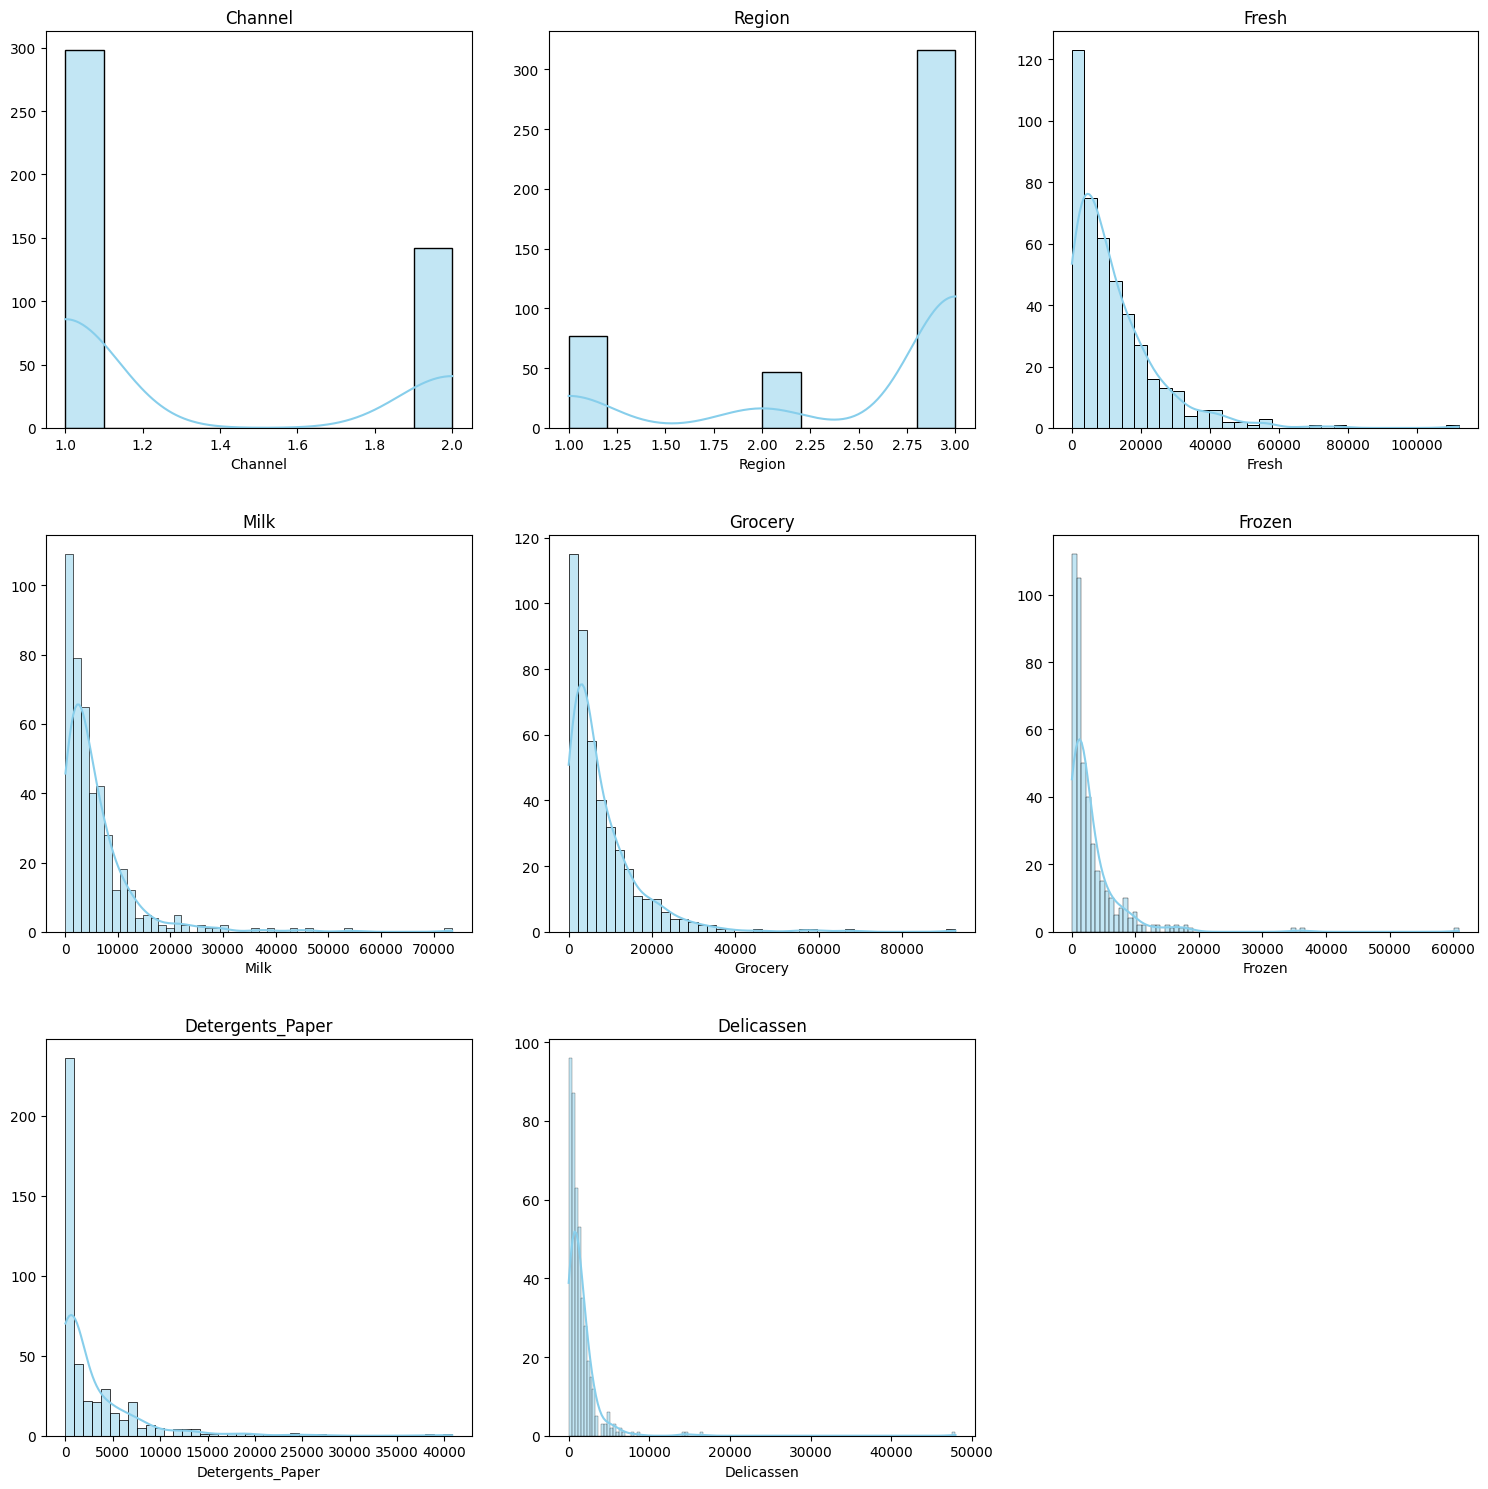

In [131]:
fig, axes = plt.subplots(nrows=(len(df.columns) + 2) // 3, ncols=3, figsize=(15, 15))

axes = axes.flatten()

for idx, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[idx], kde=True, color='skyblue')
    axes[idx].set_title(col)
    axes[idx].set_ylabel('')

for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(h_pad=3, w_pad=3)
plt.show()

In [132]:
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for col in df.select_dtypes(include='number').columns:
    outliers = calculate_outliers(df, col)
    print(f"Выбросы для '{col}': {len(outliers)} найдено")
    if not outliers.empty:
        print(outliers[[col]].head())
    print('-' * 50)

Выбросы для 'Channel': 0 найдено
--------------------------------------------------
Выбросы для 'Region': 0 найдено
--------------------------------------------------
Выбросы для 'Fresh': 20 найдено
    Fresh
29  43088
39  56159
47  44466
52  40721
87  43265
--------------------------------------------------
Выбросы для 'Milk': 28 найдено
     Milk
23  36423
28  20484
38  15729
45  22044
47  54259
--------------------------------------------------
Выбросы для 'Grocery': 24 найдено
    Grocery
28    25957
43    23998
47    55571
49    28921
56    26866
--------------------------------------------------
Выбросы для 'Frozen': 43 найдено
    Frozen
22    9408
39   10002
40    9510
47    7782
70   10643
--------------------------------------------------
Выбросы для 'Detergents_Paper': 30 найдено
    Detergents_Paper
43              9529
47             24171
49             13583
56             17740
61             26701
--------------------------------------------------
Выбросы для 'Delicass

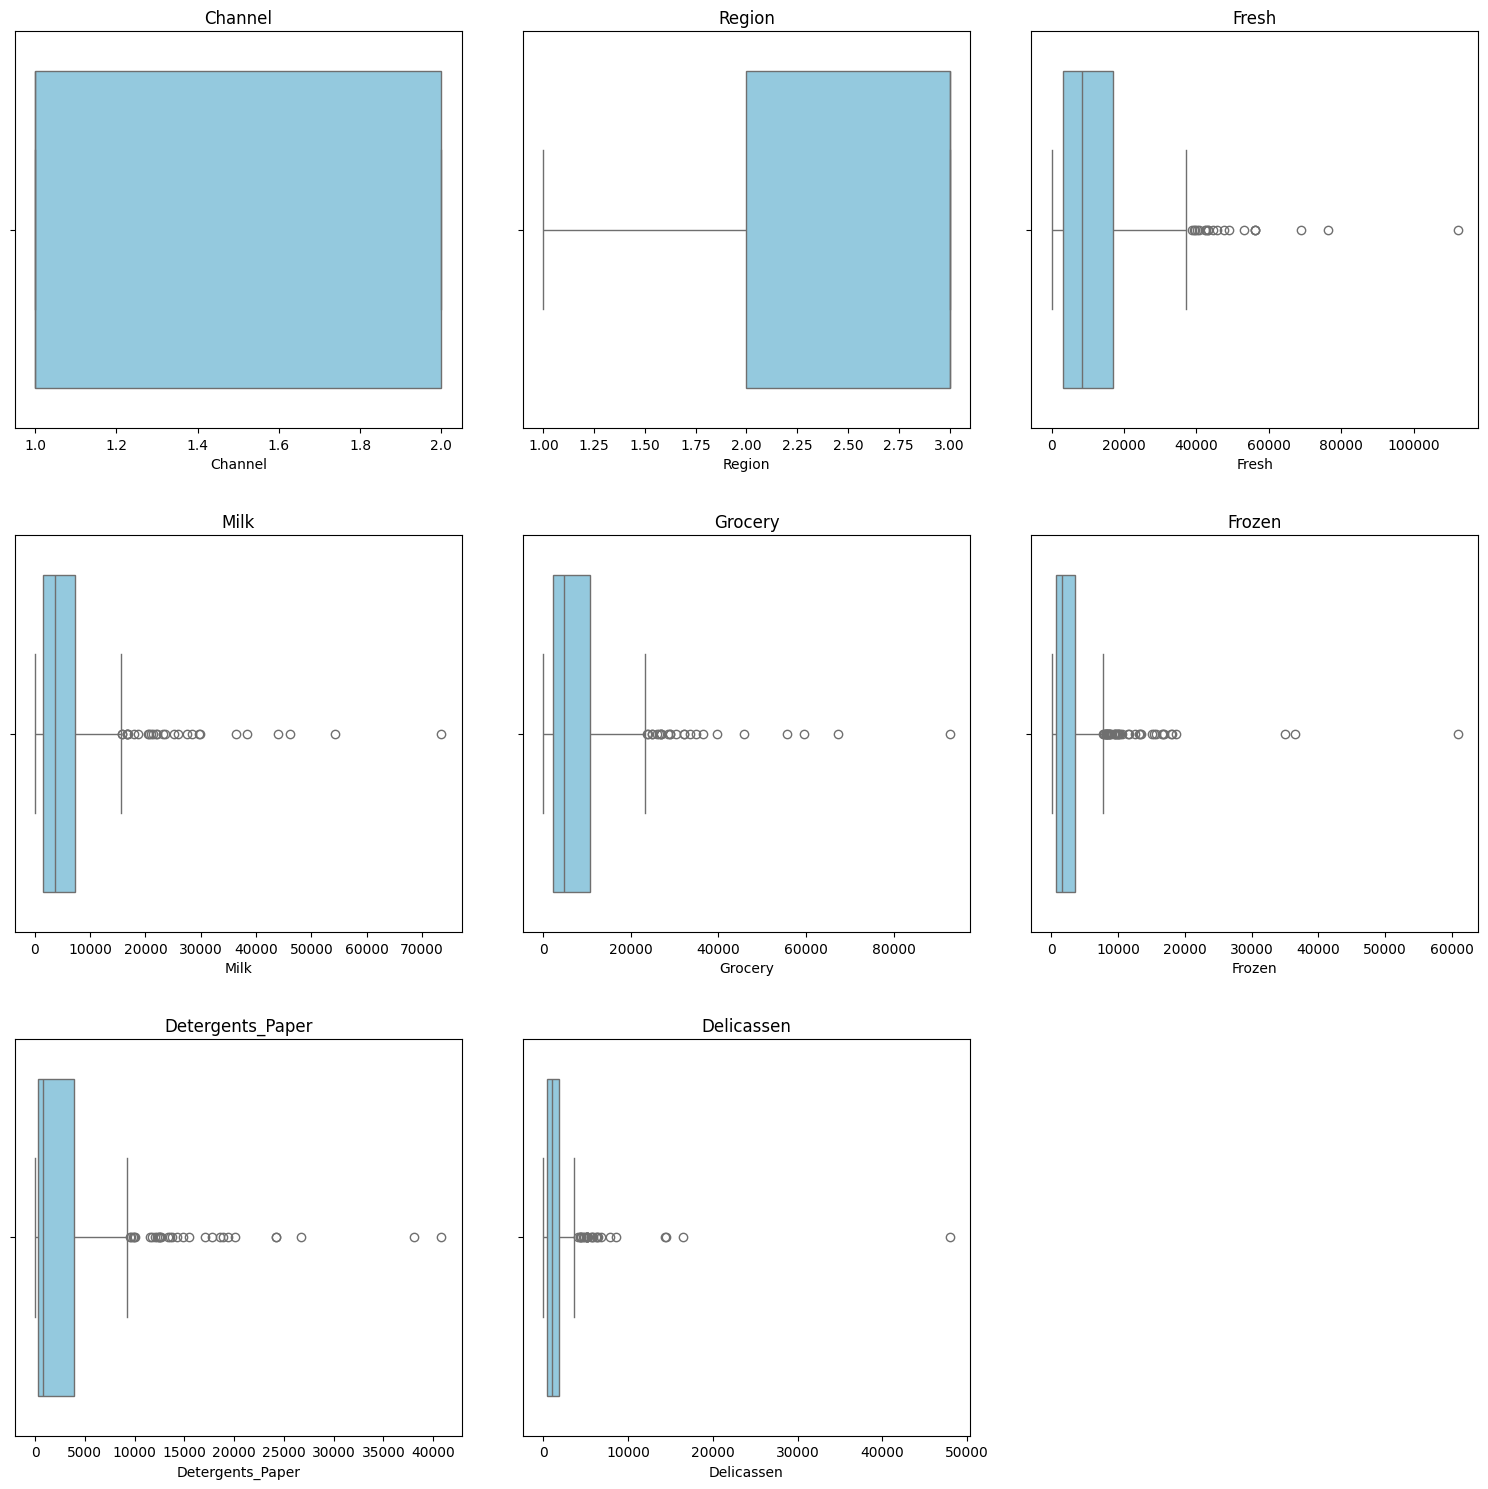

In [133]:
fig, axes = plt.subplots(nrows=(len(df.columns) + 2) // 3, ncols=3, figsize=(15, 15))

axes = axes.flatten()

for idx, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[idx], color='skyblue')
    axes[idx].set_title(col)
    axes[idx].set_ylabel('')

for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(h_pad=3, w_pad=3)
plt.show()

In [134]:
# Функция для удаления выбросов по всем числовым признакам
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Удаляем выбросы
numeric_cols = df.select_dtypes(include='number').columns
df_no_outliers = remove_outliers_iqr(df, numeric_cols)

print(f'Размер до удаления выбросов: {df.shape}')
print(f'Размер после удаления выбросов: {df_no_outliers.shape}')


Размер до удаления выбросов: (440, 8)
Размер после удаления выбросов: (318, 8)


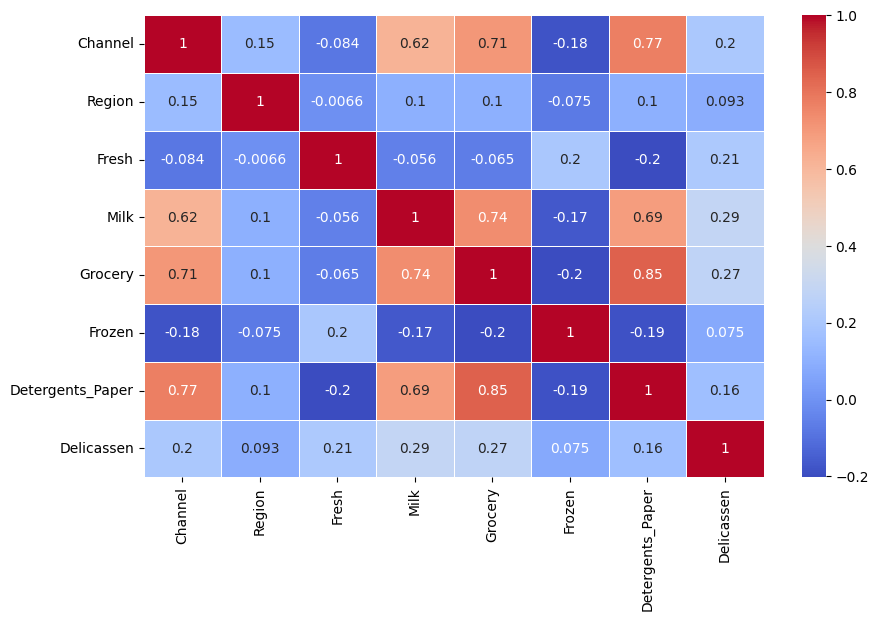

In [135]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

/tmp/ipython-input-136-2482358481.py:39: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(h_pad=3, w_pad=3)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


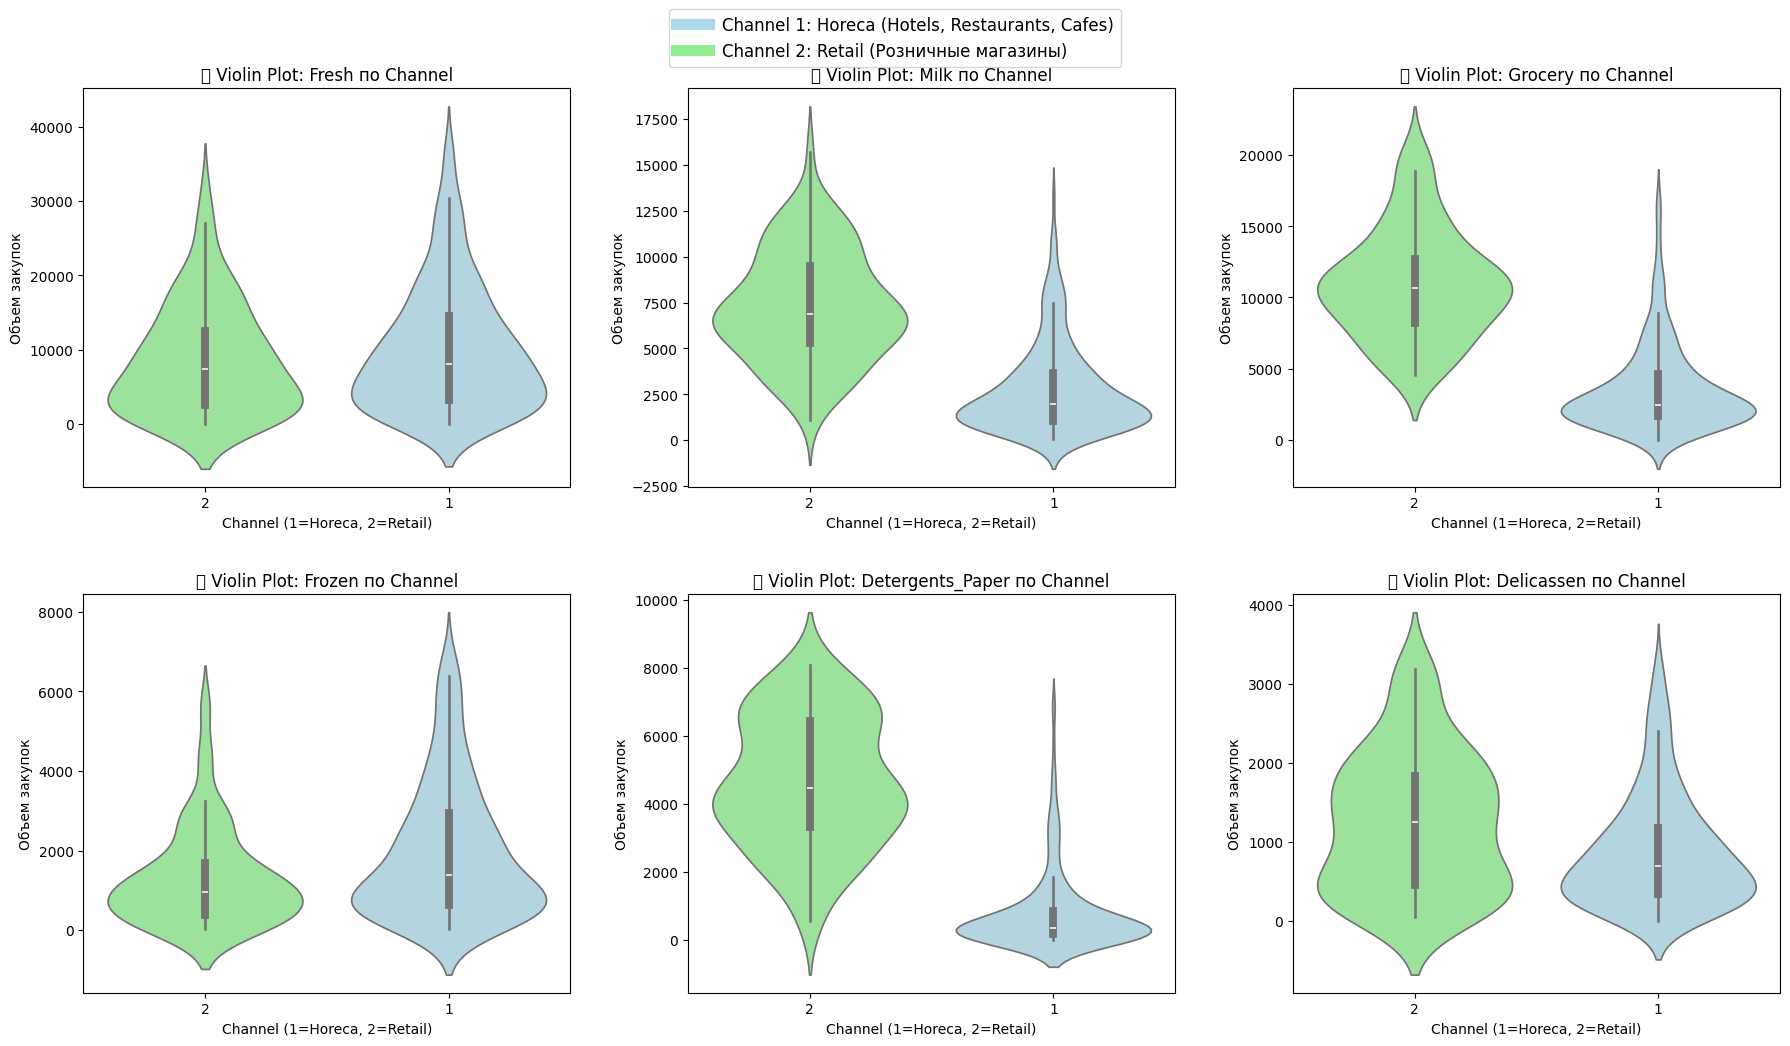

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Приводим Channel к строковому типу для корректной работы hue и palette
df_no_outliers['Channel'] = df_no_outliers['Channel'].astype(str)

# Список признаков (кроме Channel и Region)
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Цветовая палитра для каналов
palette = {'1': 'lightblue', '2': 'lightgreen'}

# Сетка графиков
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Строим Violin Plot для каждого признака
for idx, feature in enumerate(features):
    sns.violinplot(
        x='Channel',
        y=feature,
        data=df_no_outliers,
        hue='Channel',
        palette=palette,
        legend=False,  # чтобы избежать дублирования легенд
        ax=axes[idx]
    )
    axes[idx].set_title(f"🎻 Violin Plot: {feature} по Channel", fontsize=12)
    axes[idx].set_xlabel('Channel (1=Horeca, 2=Retail)')
    axes[idx].set_ylabel('Объем закупок')

# Добавляем общую легенду
handles = [
    plt.Line2D([0], [0], color='lightblue', lw=8, label='Channel 1: Horeca (Hotels, Restaurants, Cafes)'),
    plt.Line2D([0], [0], color='lightgreen', lw=8, label='Channel 2: Retail (Розничные магазины)')
]
fig.legend(handles=handles, loc='upper center', fontsize=12, ncol=1, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout(h_pad=3, w_pad=3)
plt.show()


In [137]:
for col in df_no_outliers.columns:
  if df[col].nunique() < 5:
    print(f"{col}: {df[col].unique()}")
  else:
    print(f"{col}: {df[col].nunique()} уникальных значений")

Channel: [2 1]
Region: [3 1 2]
Fresh: 433 уникальных значений
Milk: 421 уникальных значений
Grocery: 430 уникальных значений
Frozen: 426 уникальных значений
Detergents_Paper: 417 уникальных значений
Delicassen: 403 уникальных значений


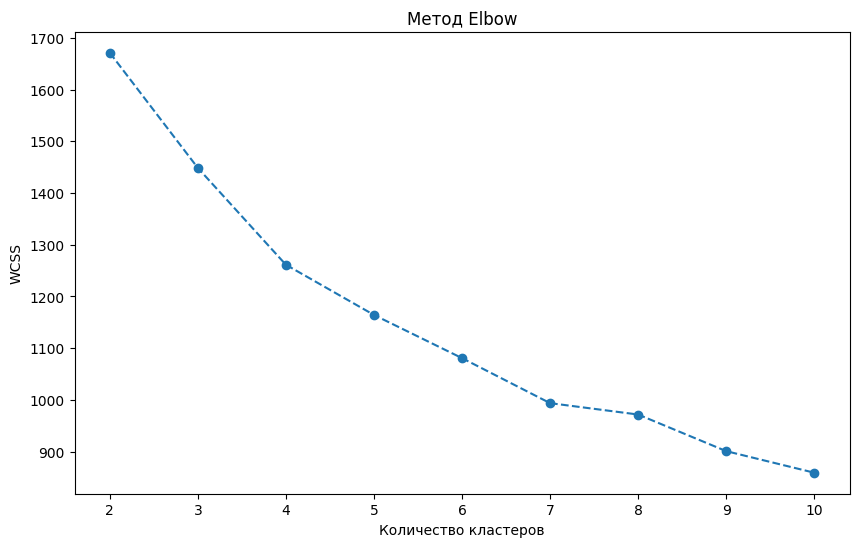

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


std = StandardScaler()
df_scaled = std.fit_transform(df_no_outliers)


iteria = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    iteria.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), iteria, marker='o', linestyle='--')
plt.title('Метод Elbow')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

In [139]:
print(iteria)

[1671.364137060543, 1448.5740988692298, 1261.2992461209726, 1164.2025007489437, 1080.6700141372753, 993.6006421172789, 971.5579503842716, 900.7474597688941, 859.0238801239932]


In [143]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)
df_no_outliers['Cluster'] = cluster_labels


In [144]:
sil_score = silhouette_score(df_scaled, cluster_labels)
print(f'Silhouette Score: {sil_score:.3f}')

Silhouette Score: 0.231


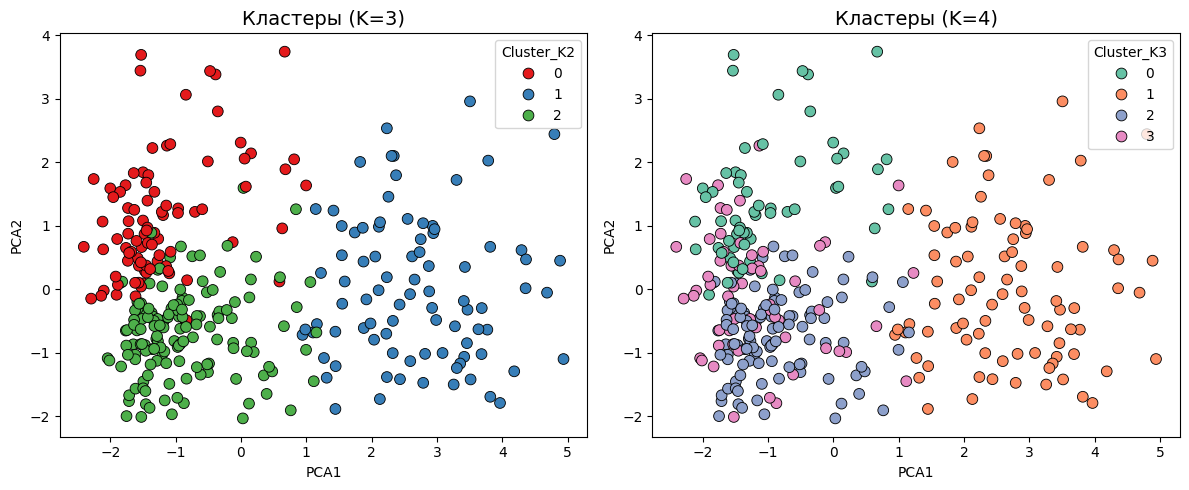

In [145]:
# PCA 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Создаём DataFrame с PCA и кластерами
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])

# Добавляем кластеры для K=3
kmeans_2 = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster_K2'] = kmeans_2.fit_predict(df_scaled)

# Добавляем кластеры для K=4
kmeans_3 = KMeans(n_clusters=4, random_state=42)
pca_df['Cluster_K3'] = kmeans_3.fit_predict(df_scaled)

# Визуализация
plt.figure(figsize=(12, 5))

# K=3
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=pca_df, x='PCA1', y='PCA2',
    hue='Cluster_K2', palette='Set1',
    s=60, edgecolor='k'
)
plt.title('Кластеры (K=3)', fontsize=14)

# K=4
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=pca_df, x='PCA1', y='PCA2',
    hue='Cluster_K3', palette='Set2',
    s=60, edgecolor='k'
)
plt.title('Кластеры (K=4)', fontsize=14)

plt.tight_layout()
plt.show()

Найдено кластеров (включая выбросы): 7
Метки кластеров: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(-1)}


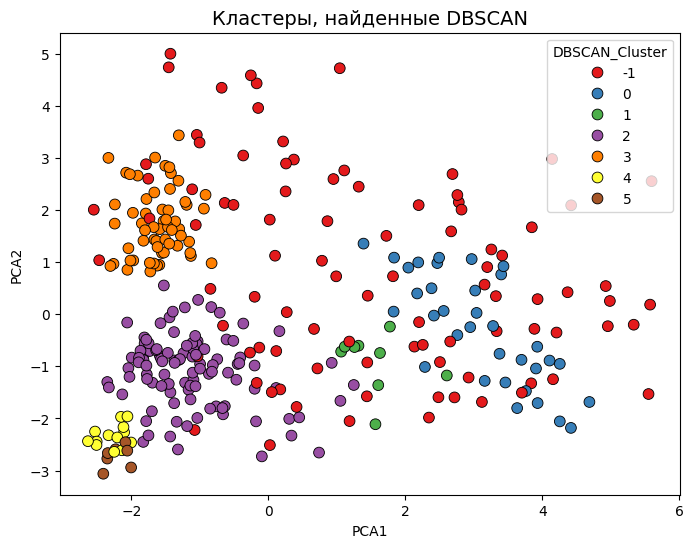

In [157]:
from sklearn.cluster import DBSCAN

# Масштабируем данные (DBSCAN чувствителен к масштабу)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_no_outliers)

# Применяем DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # eps и min_samples можно подобрать
dbscan_labels = dbscan.fit_predict(df_scaled)

# Добавляем метки в DataFrame
df_no_outliers['DBSCAN_Cluster'] = dbscan_labels

# Посмотрим сколько кластеров нашёл DBSCAN
unique_labels = set(dbscan_labels)
print(f"Найдено кластеров (включая выбросы): {len(unique_labels)}")
print(f"Метки кластеров: {unique_labels}")

# Визуализация (PCA 2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)
df_no_outliers['PCA1'] = pca_components[:, 0]
df_no_outliers['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='DBSCAN_Cluster',
    palette='Set1',
    data=df_no_outliers,
    s=60, edgecolor='k'
)
plt.title('Кластеры, найденные DBSCAN', fontsize=14)
plt.show()


In [166]:
df_no_outliers['DBSCAN_Cluster'].value_counts()

,count
DBSCAN_Cluster,
2,104
-1,93
3,58
0,34
4,13
1,9
5,7


In [162]:
# Оставляем только числовые колонки
numeric_cols = df_no_outliers.select_dtypes(include='number').columns

# Группировка только по числовым колонкам
cluster_profiles = df_no_outliers[df_no_outliers['DBSCAN_Cluster'] != -1] \
    .groupby('DBSCAN_Cluster')[numeric_cols].mean()

# Смотрим результат
cluster_profiles


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,Cluster_DB,PCA1,PCA2,DBSCAN_Cluster
DBSCAN_Cluster,,,,,,,,,,,,
0,2.941176,5979.617647,7823.882353,10214.735294,857.558824,4570.882353,1503.823529,1.0,-1.0,3.101655,-0.291257,0.0
1,2.888889,10196.444444,3711.888889,7939.111111,735.111111,3691.333333,261.444444,1.0,-1.0,1.546724,-0.911127,1.0
2,2.576923,6948.875000,2565.028846,3307.019231,1086.634615,763.961538,706.028846,2.0,-1.0,-1.109602,-1.089916,2.0
3,2.465517,15074.086207,1506.137931,2380.931034,3365.362069,369.879310,868.344828,0.0,-1.0,-1.613140,1.751179,3.0
4,3.000000,6319.230769,1258.307692,1629.000000,1010.923077,226.923077,445.384615,2.0,1.0,-2.273774,-2.338015,4.0
5,3.000000,729.571429,636.142857,801.000000,575.285714,79.571429,173.428571,2.0,0.0,-2.213777,-2.728127,5.0


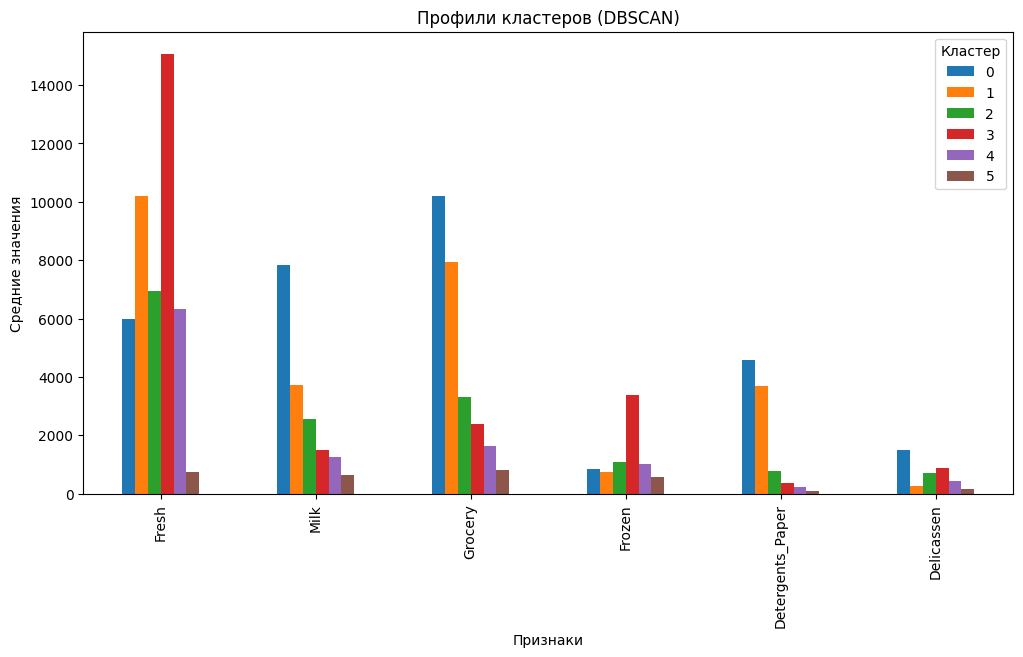

In [164]:
numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Строим график
cluster_profiles[numeric_cols].T.plot(kind='bar', figsize=(12, 6))
plt.title("Профили кластеров (DBSCAN)")
plt.xlabel("Признаки")
plt.ylabel("Средние значения")
plt.legend(title="Кластер")
plt.show()

In [168]:
outliers_profile = df_no_outliers[df_no_outliers['DBSCAN_Cluster'] == -1].describe()
outliers_profile

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,Cluster_DB,PCA1,PCA2,DBSCAN_Cluster
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.0,93.000000,93.000000,93.0
mean,2.333333,11946.935484,6389.344086,9050.430108,2270.397849,3142.666667,1383.817204,0.881720,-1.0,1.447737,0.853514,-1.0
std,0.888738,10159.049513,3351.303126,5137.083757,1929.240063,2544.315357,987.212621,0.720046,0.0,2.076189,1.886256,0.0
min,1.000000,140.000000,577.000000,572.000000,25.000000,20.000000,3.000000,0.000000,-1.0,-2.550394,-2.510850,-1.0
25%,1.000000,3136.000000,3749.000000,5119.000000,805.000000,694.000000,497.000000,0.000000,-1.0,-0.170855,-0.640153,-1.0
50%,3.000000,8656.000000,6327.000000,8814.000000,1504.000000,2575.000000,1265.000000,1.000000,-1.0,1.180401,0.568447,-1.0
75%,3.000000,18692.000000,8323.000000,12311.000000,3252.000000,5316.000000,2165.000000,1.000000,-1.0,3.117090,2.287407,-1.0
max,3.000000,37036.000000,15729.000000,20292.000000,6845.000000,8035.000000,3271.000000,2.000000,-1.0,5.594861,4.998667,-1.0


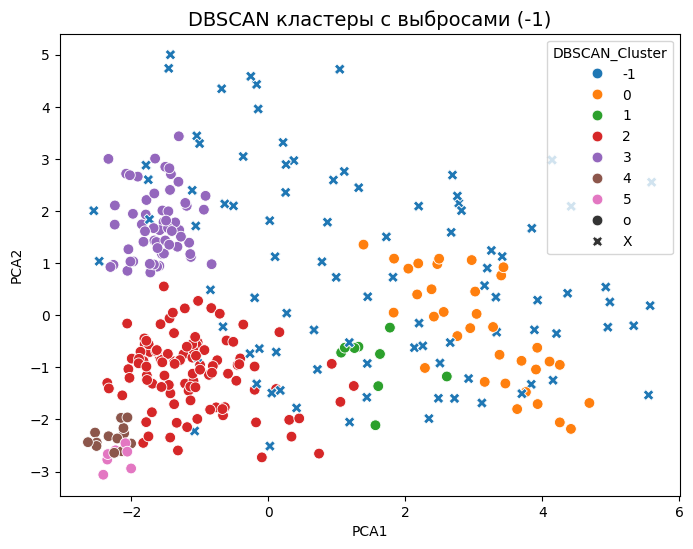

In [169]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    data=df_no_outliers,
    hue='DBSCAN_Cluster',
    palette='tab10',
    style=df_no_outliers['DBSCAN_Cluster'].apply(lambda x: 'X' if x == -1 else 'o'),
    s=60
)
plt.title("DBSCAN кластеры с выбросами (-1)", fontsize=14)
plt.show()


Найдено кластеров (включая выбросы): 8
Метки кластеров: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(-1)}


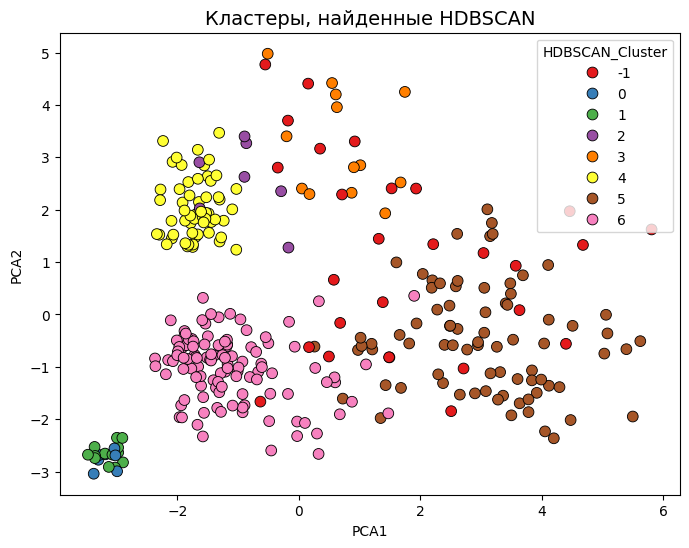

In [170]:
from sklearn.cluster import HDBSCAN

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_no_outliers)

hd_db = HDBSCAN(min_cluster_size=5)
hd_db_labels = hd_db.fit_predict(df_scaled)

df_no_outliers['HDBSCAN_Cluster'] = hd_db_labels

unique_labels = set(hd_db_labels)
print(f"Найдено кластеров (включая выбросы): {len(unique_labels)}")
print(f"Метки кластеров: {unique_labels}")

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)
df_no_outliers['PCA1'] = pca_components[:, 0]
df_no_outliers['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='HDBSCAN_Cluster',
    palette='Set1',
    data=df_no_outliers,
    s=60, edgecolor='k'
)
plt.title('Кластеры, найденные HDBSCAN', fontsize=14)
plt.show()

In [171]:
df_no_outliers['HDBSCAN_Cluster'].value_counts()

,count
HDBSCAN_Cluster,
6,114
5,79
4,58
-1,27
3,13
1,13
0,7
2,7


In [176]:
# Оставляем только числовые колонки
numeric_cols = df_no_outliers.select_dtypes(include='number').columns

# Группировка только по числовым колонкам
cluster_profiles = df_no_outliers[df_no_outliers['HDBSCAN_Cluster'] != -1] \
    .groupby('DBSCAN_Cluster')[numeric_cols].mean()

# Смотрим результат
cluster_profiles


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,Cluster_DB,PCA1,PCA2,DBSCAN_Cluster,HDBSCAN_Cluster
DBSCAN_Cluster,,,,,,,,,,,,,
-1,2.303030,10701.606061,6227.621212,8791.833333,2213.727273,3314.106061,1323.121212,0.878788,-1.0,1.941472,0.614964,-1.0,4.439394
0,2.941176,5979.617647,7823.882353,10214.735294,857.558824,4570.882353,1503.823529,1.000000,-1.0,3.097632,-0.616215,0.0,5.000000
1,2.888889,10196.444444,3711.888889,7939.111111,735.111111,3691.333333,261.444444,1.000000,-1.0,1.413083,-0.927781,1.0,5.000000
2,2.576923,6948.875000,2565.028846,3307.019231,1086.634615,763.961538,706.028846,2.000000,-1.0,-1.270031,-1.036074,2.0,6.000000
3,2.465517,15074.086207,1506.137931,2380.931034,3365.362069,369.879310,868.344828,0.000000,-1.0,-1.693293,2.031764,3.0,4.000000
4,3.000000,6319.230769,1258.307692,1629.000000,1010.923077,226.923077,445.384615,2.000000,1.0,-3.130679,-2.655722,4.0,1.000000
5,3.000000,729.571429,636.142857,801.000000,575.285714,79.571429,173.428571,2.000000,0.0,-3.170144,-2.772428,5.0,0.000000


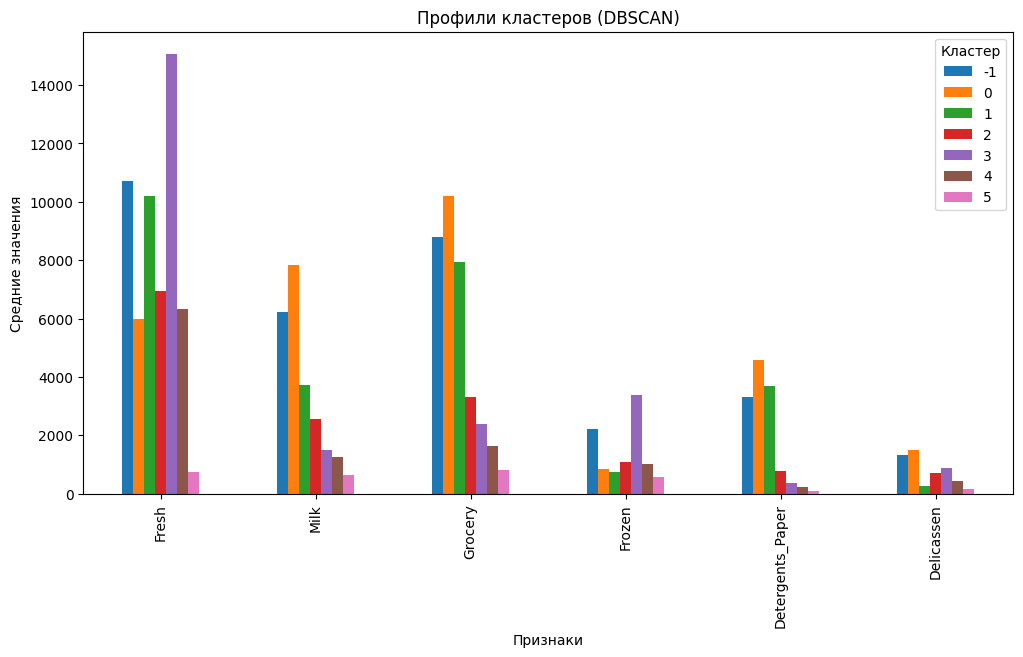

In [177]:
numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Строим график
cluster_profiles[numeric_cols].T.plot(kind='bar', figsize=(12, 6))
plt.title("Профили кластеров (DBSCAN)")
plt.xlabel("Признаки")
plt.ylabel("Средние значения")
plt.legend(title="Кластер")
plt.show()

/tmp/ipython-input-179-2466808344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


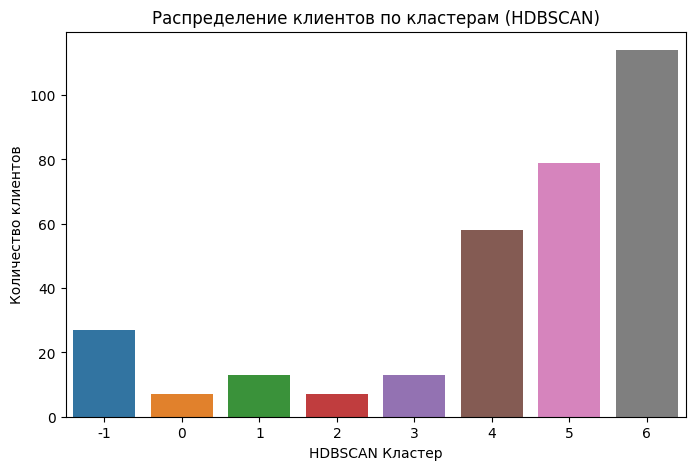

In [179]:
plt.figure(figsize=(8, 5))
sns.countplot(
    x='HDBSCAN_Cluster',
    data=df_no_outliers,
    palette='tab10'
)
plt.title('Распределение клиентов по кластерам (HDBSCAN)')
plt.xlabel('HDBSCAN Кластер')
plt.ylabel('Количество клиентов')
plt.show()

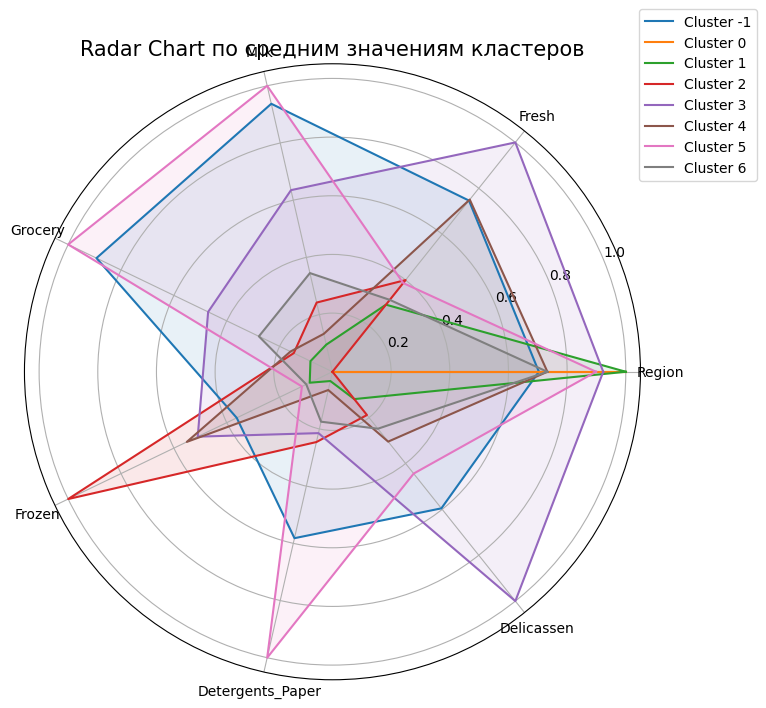

In [185]:

# Выбираем только числовые признаки (кроме меток кластеров и PCA)
exclude_cols = ['Cluster', 'Cluster_DB', 'DBSCAN_Cluster', 'HDBSCAN_Cluster', 'PCA1', 'PCA2']
numeric_cols = [col for col in df_no_outliers.select_dtypes(include='number').columns if col not in exclude_cols]

# Группировка по кластерам и вычисление среднего
cluster_profiles = df_no_outliers.groupby('HDBSCAN_Cluster')[numeric_cols].mean()

# Нормализуем значения для красивого отображения на графике
cluster_profiles_norm = cluster_profiles.copy()
for col in cluster_profiles_norm.columns:
    min_val = cluster_profiles_norm[col].min()
    max_val = cluster_profiles_norm[col].max()
    cluster_profiles_norm[col] = (cluster_profiles_norm[col] - min_val) / (max_val - min_val)

# Построение Radar chart
categories = cluster_profiles_norm.columns.tolist()
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # чтобы замкнуть график

# Создание подграфиков
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for idx, row in cluster_profiles_norm.iterrows():
    values = row.tolist()
    values += values[:1]  # замыкаем линию
    ax.plot(angles, values, label=f'Cluster {idx}')
    ax.fill(angles, values, alpha=0.1)

# Настройки графика
ax.set_title('Radar Chart по средним значениям кластеров', size=15)
ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=10)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()


In [186]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Признаки и целевая переменная
X = df_no_outliers[numeric_cols]  # только числовые столбцы
y = df_no_outliers['HDBSCAN_Cluster']  # целевая переменная - кластер

# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Модель Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Предсказания
y_pred = rf.predict(X_test)

# Оценка модели
print("Классификационный отчёт:\n", classification_report(y_test, y_pred))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred))


Классификационный отчёт:
               precision    recall  f1-score   support

          -1       1.00      0.20      0.33         5
           0       0.00      0.00      0.00         1
           1       0.50      0.67      0.57         3
           2       1.00      1.00      1.00         1
           3       0.67      0.67      0.67         3
           4       0.80      1.00      0.89        12
           5       0.83      0.94      0.88        16
           6       0.86      0.83      0.84        23

    accuracy                           0.81        64
   macro avg       0.71      0.66      0.65        64
weighted avg       0.82      0.81      0.79        64

Матрица ошибок:
 [[ 1  0  0  0  1  2  1  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  1]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  0  2  0  0  1]
 [ 0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0 15  1]
 [ 0  0  1  0  0  1  2 19]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


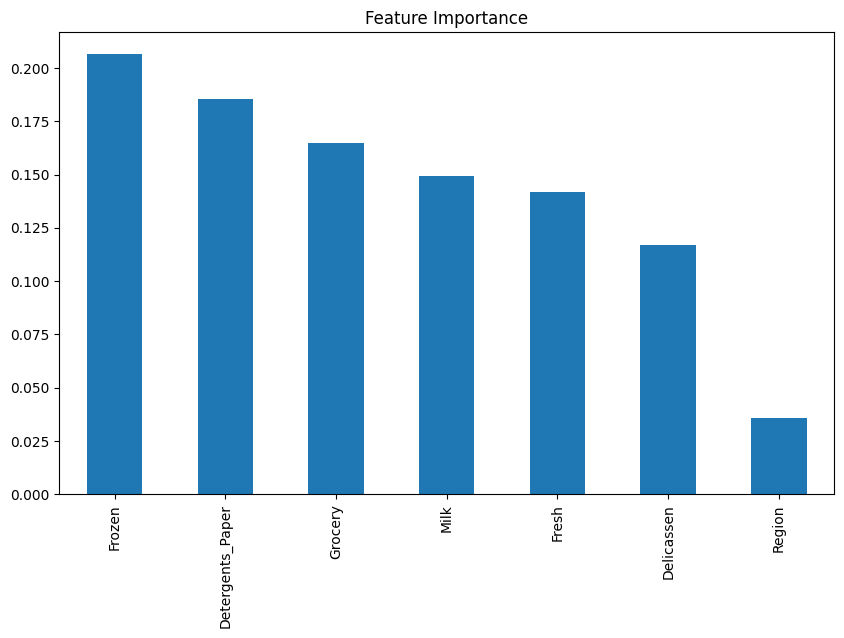

In [187]:
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(10,6), title='Feature Importance')
plt.show()


# ✅ Финальный вывод по проекту кластеризации и прогнозирования

В рамках проекта была выполнена сегментация клиентов с использованием алгоритмов кластеризации и последующей бизнес-интерпретации полученных групп.

---

## 🗂 Результаты кластеризации

- 📌 **Кластеризация с помощью KMeans** выявила оптимальное количество сегментов — **3**, но при этом наблюдалось пересечение кластеров.  
- 📌 Для более устойчивого разбиения были применены алгоритмы **DBSCAN** и **HDBSCAN**, которые позволили:
  - Выделить **7 основных кластеров**.
  - Обнаружить группу клиентов с аномальным поведением (выбросы), что может быть полезно для анализа VIP-клиентов или ошибок в данных.

---

## 📊 Бизнес-профили клиентов

- **Кластер 0**:  
  Покупают много замороженных товаров и деликатесов, редко берут бытовую химию. Возможно, это сегмент ресторанов или отелей.  

- **Кластер 1**:  
  Делают небольшие заказы по всем категориям, что может свидетельствовать о частных клиентах или мелких точках продаж.  

- **Кластер 2**:  
  Активно закупают молочные продукты и бытовую химию, могут быть магазинами розничной торговли.  

- **Выбросы (-1)**:  
  Клиенты с нестандартными покупками, требуют отдельного анализа.

---

## 🧠 Результаты прогнозирования

- Построена модель (RandomForest), позволяющая по признакам новых клиентов отнести их к одному из сегментов.  
- 📈 **Точность (accuracy): 81%**
- Модель хорошо различает крупные сегменты, но на редких кластерах качество ниже. Это можно улучшить балансировкой классов или объединением мелких кластеров.

---

## 💡 Рекомендации

1. 📦 **Маркетинг**:
   - Для Кластера 0 запустить кампании с акцентом на замороженные продукты и деликатесы.
   - Для Кластера 2 продвигать молочные продукты и бытовую химию.

2. 📈 **Дальнейшее развитие**:
   - Проверить поведение клиентов-выбросов (-1): это могут быть либо VIP-клиенты, либо ошибки в данных.
   - Добавить новые признаки (например, частота заказов, сезонность) для улучшения сегментации.

3. 🤖 **Автоматизация**:
   - Интегрировать модель классификации в CRM, чтобы автоматически определять сегмент нового клиента и предлагать персонализированные рекомендации.

---
